In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# from nltk import word_tokenize

In [3]:
tweets = pd.read_csv("./Tweets.csv")

In [12]:
tweets.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
tweets.shape

(14640, 15)

In [20]:
#this
review_dataset["tweet_coord"].dropna()
# or this
review_dataset["tweet_coord"][~review_dataset["tweet_coord"].isnull()]


21        [40.74804263, -73.99295302]
28          [42.361016, -71.02000488]
29        [33.94540417, -118.4062472]
32       [33.94209449, -118.40410103]
34          [33.2145038, -96.9321504]
                     ...             
14577    [33.93939612, -118.38973148]
14596    [35.22534456, -106.57241352]
14612     [40.46692522, -82.64567078]
14624      [32.9070889, -97.03785947]
14625     [40.64946781, -73.76624703]
Name: tweet_coord, Length: 1019, dtype: object

In [13]:
tweets.text.tail()

14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, dtype: object

(-0.5, 399.5, 199.5, -0.5)

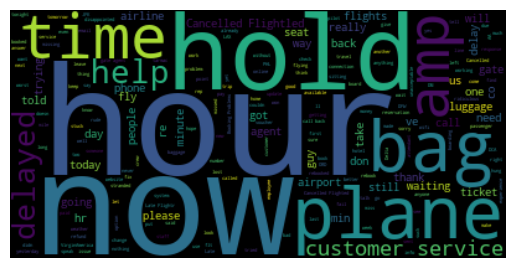

In [3]:
from wordcloud import WordCloud, STOPWORDS
# Building a word cloud for negative tweet text
negative_tweets = tweets["text"][tweets["airline_sentiment"] =="negative"]
joined_negative_tweets = "".join(negative_tweets)

my_stop_words = set(STOPWORDS)
# reg = r"@"|
my_stop_words = my_stop_words.union(["@VirginAmerica", "united","flight","AmericanAir","USAirways","SouthwestAir","JetBlue"])
word_cloud = WordCloud(stopwords=my_stop_words, regexp=r'\b[^\d\W][^\d\W]+\b').generate(joined_negative_tweets)

#show word cloud
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")




(-0.5, 399.5, 199.5, -0.5)

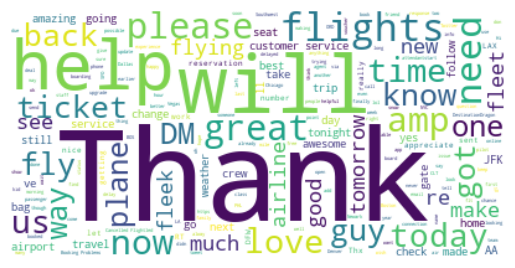

In [4]:
from wordcloud import WordCloud, STOPWORDS
# Building a word cloud for negative tweet text
# positive_neutral_tweets = tweets["text"][~tweets["airline_sentiment"] =="negative"]
positive_neutral_tweets = tweets["text"][tweets["airline_sentiment"] !="negative"]
joined_positive_neutral_tweets = "".join(positive_neutral_tweets)

my_stop_words = set(STOPWORDS)
# reg = r"@"|
my_stop_words = my_stop_words.union(["@VirginAmerica", "united","flight","AmericanAir","USAirways","SouthwestAir", "JetBlue","VirginAmerica","co", "t"])
word_cloud = WordCloud(background_color="white", stopwords=my_stop_words, regexp=r'\b[^\d\W][^\d\W]+\b').generate(joined_positive_neutral_tweets)

#show word cloud
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")




In [40]:
tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [18]:
# feature engineering
tweets = tweets[["text","airline_sentiment"]]
tweets

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,2
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,2
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,1
14638,"@AmericanAir you have my money, you change my ...",0


In [19]:
from nltk import word_tokenize
tokens = [word_tokenize(word) for word in tweets.text]
length =[] 
for i in range(len(tokens)):
    length.append(len(tokens[i]))
    
tweets["text_length"] = length

In [20]:
tweets["text_length"]

0         7
1        13
2        16
3        24
4        12
         ..
14635    13
14636    27
14637     9
14638    30
14639    33
Name: text_length, Length: 14640, dtype: int64

In [21]:
from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()
tweets.airline_sentiment = le.fit_transform(tweets.airline_sentiment)

In [23]:
tweets

,text,airline_sentiment,text_length
0,@VirginAmerica What @dhepburn said.,1,7
1,@VirginAmerica plus you've added commercials t...,2,13
2,@VirginAmerica I didn't today... Must mean I n...,1,16
3,@VirginAmerica it's really aggressive to blast...,0,24
4,@VirginAmerica and it's a really big bad thing...,0,12
...,...,...,...
14635,@AmericanAir thank you we got on a different f...,2,13
14636,@AmericanAir leaving over 20 minutes Late Flig...,0,27
14637,@AmericanAir Please bring American Airlines to...,1,9
14638,"@AmericanAir you have my money, you change my ...",0,30


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200,
                    token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
# Create sparse matrix from the vectorizer
X_tfidf = vect.transform(tweets.text)

# Create a DataFrame
X_tfidf_transformed = pd.DataFrame(X_tfidf.toarray(), columns=vect.get_feature_names_out())
X_tfidf_transformed.head()
# can also do this: max_df= 0.9, min_df=0.01

,aa,able,agent,agents,ago,air,airline,airlines,airport,americanair,...,way,weather,website,week,wifi,won,work,working,worst,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
len(X_tfidf_transformed.columns)

200

In [30]:
tweets.drop("text", inplace=True, axis=1)

In [31]:
tweets

,airline_sentiment,text_length
0,1,7
1,2,13
2,1,16
3,0,24
4,0,12
...,...,...
14635,2,13
14636,0,27
14637,1,9
14638,0,30


In [33]:
data = pd.concat([ X_tfidf_transformed, tweets], axis=1)

In [34]:
data

,aa,able,agent,agents,ago,air,airline,airlines,airport,americanair,...,website,week,wifi,won,work,working,worst,yes,airline_sentiment,text_length
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,13
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,16
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.365307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,13
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.135932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.90525,0.0,0.424879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.290299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30


In [35]:
# Lastly, build the classifier
# Define X and y
y = data.airline_sentiment
X = data.drop('airline_sentiment', axis=1)


In [36]:
from sklearn.model_selection import train_test_split
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train a logistic regression
log_reg = LogisticRegression(solver="newton-cg", C= 1).fit(X_train, y_train)

# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
# print(confusion_matrix(y_test, y_predicted)/len(y_test))
print(confusion_matrix(y_test, y_predicted))

Accuracy on the test set:  0.7575136612021858
[[1682  131   40]
 [ 282  279   41]
 [ 144   72  257]]
